In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = sns.load_dataset("tips")

In [ ]:
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in data.columns:
    if data[col].dtype == 'object' or data[col].dtype.name == 'category':
        data[col] = le.fit_transform(data[col])

In [ ]:
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4
...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,1,0,3
240,27.18,2.00,0,1,1,0,2
241,22.67,2.00,1,1,1,0,2
242,17.82,1.75,1,0,1,0,2


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data = sc.fit_transform(data)

In [ ]:
data

array([[-3.14711305e-01, -1.43994695e+00, -1.34335316e+00, ...,
         2.79157595e-01, -6.21581561e-01, -6.00192629e-01],
       [-1.06323531e+00, -9.69205340e-01,  7.44405889e-01, ...,
         2.79157595e-01, -6.21581561e-01,  4.53382921e-01],
       [ 1.37779900e-01,  3.63355539e-01,  7.44405889e-01, ...,
         2.79157595e-01, -6.21581561e-01,  4.53382921e-01],
       ...,
       [ 3.24629502e-01, -7.22971264e-01,  7.44405889e-01, ...,
        -8.02024201e-01, -6.21581561e-01, -6.00192629e-01],
       [-2.21286504e-01, -9.04025732e-01,  7.44405889e-01, ...,
        -8.02024201e-01, -6.21581561e-01, -6.00192629e-01],
       [-1.13228903e-01,  1.24660453e-03, -1.34335316e+00, ...,
         1.36033939e+00, -6.21581561e-01, -6.00192629e-01]])

In [ ]:
data = pd.read_csv("/content/name_age_salary.csv")
data.columns = data.columns.str.strip()
data

,Name,Age,Salary
0,John,28,55000
1,Alice,32,72000
2,Michael,45,95000
3,Sophia,29,60000
4,David,35,80000
5,Emma,26,48000
6,James,40,88000
7,Olivia,30,65000
8,Robert,50,105000
9,Isabella,27,53000


<Axes: xlabel='Age', ylabel='Salary'>

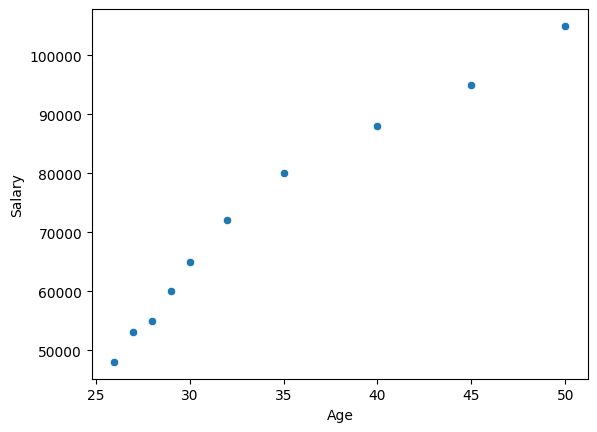

In [ ]:
sns.scatterplot(x = "Age", y = "Salary", data = data)

In [ ]:
#k_mean
from sklearn.cluster import KMeans

In [ ]:
km = KMeans(n_clusters = 3)

In [ ]:
y_predicted = km.fit_predict(data[["Age","Salary"]])
y_predicted

array([0, 2, 1, 2, 1, 0, 1, 2, 1, 0], dtype=int32)

In [ ]:
data["range"] = y_predicted

In [ ]:
data

,Name,Age,Salary,range
0,John,28,55000,0
1,Alice,32,72000,2
2,Michael,45,95000,1
3,Sophia,29,60000,2
4,David,35,80000,1
5,Emma,26,48000,0
6,James,40,88000,1
7,Olivia,30,65000,2
8,Robert,50,105000,1
9,Isabella,27,53000,0


In [ ]:
data1 = data[data.range==0]
data2 = data[data.range==1]
data3 = data[data.range==2]

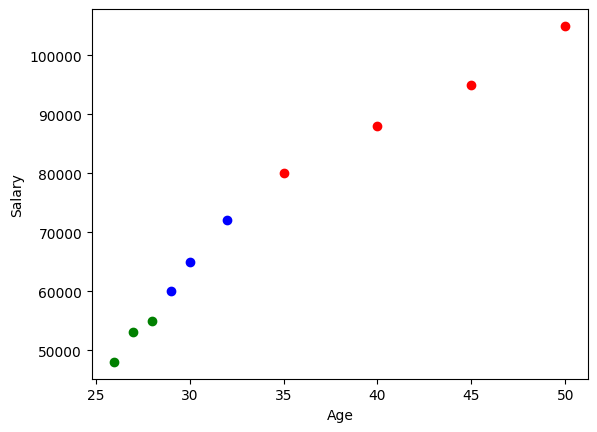

In [ ]:
plt.scatter(data1.Age,data1["Salary"],color="green")
plt.scatter(data2.Age,data2["Salary"],color="red")
plt.scatter(data3.Age,data3["Salary"],color="blue")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()

In [ ]:
data

,Name,Age,Salary,range
0,John,28,55000,0
1,Alice,32,72000,2
2,Michael,45,95000,1
3,Sophia,29,60000,2
4,David,35,80000,1
5,Emma,26,48000,0
6,James,40,88000,1
7,Olivia,30,65000,2
8,Robert,50,105000,1
9,Isabella,27,53000,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler


In [ ]:
minmax = MinMaxScaler()
data["Salary"]= minmax.fit_transform(data[["Salary"]])

In [ ]:
data

,Name,Age,Salary,range
0,John,28,0.122807,0
1,Alice,32,0.421053,2
2,Michael,45,0.824561,1
3,Sophia,29,0.210526,2
4,David,35,0.561404,1
5,Emma,26,0.000000,0
6,James,40,0.701754,1
7,Olivia,30,0.298246,2
8,Robert,50,1.000000,1
9,Isabella,27,0.087719,0


In [ ]:
km =KMeans(n_clusters= 3)
y_predicted = km.fit_predict(data[["Age","Salary"]])
y_predicted

array([0, 0, 1, 0, 1, 0, 1, 0, 2, 0], dtype=int32)

In [ ]:
data["Cluster"] = y_predicted

In [ ]:
data

,Name,Age,Salary,range,Cluster
0,John,28,0.122807,0,0
1,Alice,32,0.421053,2,0
2,Michael,45,0.824561,1,1
3,Sophia,29,0.210526,2,0
4,David,35,0.561404,1,1
5,Emma,26,0.000000,0,0
6,James,40,0.701754,1,1
7,Olivia,30,0.298246,2,0
8,Robert,50,1.000000,1,2
9,Isabella,27,0.087719,0,0


<Axes: xlabel='range', ylabel='Cluster'>

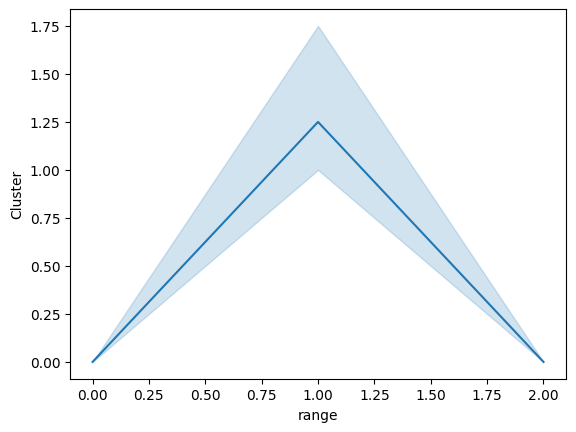

In [ ]:
sns.lineplot(x="range", y="Cluster", data=data)

In [ ]:
km.cluster_centers_

array([[28.66666667,  0.19005848],
       [40.        ,  0.69590643],
       [50.        ,  1.        ]])

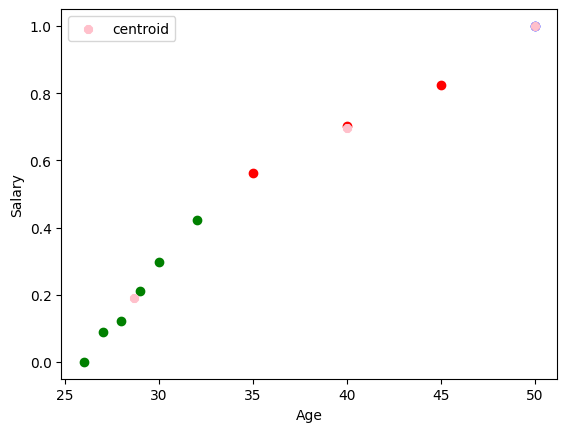

In [ ]:
data1 =data[data.Cluster == 0]
data2 =data[data.Cluster == 1]
data3 =data[data.Cluster == 2]
plt.scatter(data1.Age,data1["Salary"],color="green",Label ="")
plt.scatter(data2.Age,data2["Salary"],color="red")
plt.scatter(data3.Age,data3["Salary"],color="blue")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="pink",label ="centroid",marker = "8")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.legend()

In [ ]:
k_rang = range(1,10)
sse = []
for k in k_rang:
  km = KMeans(n_clusters=k)
  km.fit(data[["Age","Salary"]])
  sse.append(km.inertia_)

In [ ]:
sse

[608.6332102185288,
 107.99402013806446,
 64.60735610957218,
 31.722273520057453,
 14.56241920590951,
 6.697034985123628,
 5.189648096850314,
 1.0044629116651276,
 0.5006155740227762]